(2,0,0) means <br>autoregressive order (2), the order of any differencing (0), and then the order of the moving average part (0).

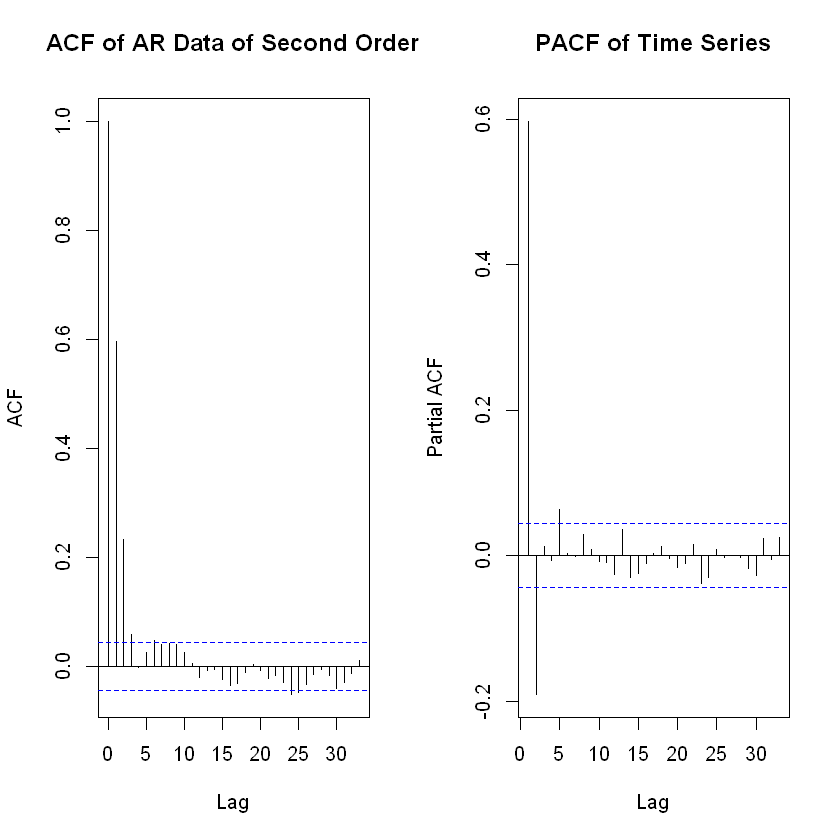

In [24]:
set.seed(43) 
data = arima.sim( list(order = c(2,0,0), ar =c( 0.7, -.2)), n = 2000)
par(mfrow=c(1,2))
acf(data, main="ACF of AR Data of Second Order")
acf(data, type="partial", main="PACF of Time Series")

Tip: always take series with high number of data points n~20k or else there would be seen significant number of PACF than the order p for AR(p)

Rather than estimate the coefficients by writing our own routines, we can invoke a very useful command called arima(). We must give it the order of the process though.

In [25]:
arima(data, order=c(2,0,0), include.mean=FALSE )


Call:
arima(x = data, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7111  -0.1912
s.e.  0.0219   0.0220

sigma^2 estimated as 0.9985:  log likelihood = -2836.64,  aic = 5679.27

Try it for some p: 1 to 5 values

In [44]:
SSE=NULL
AIC=NULL
for (p in 1:5) {
    m = arima(data, order=c(p,0,0), include.mean=FALSE )
    SSE[p] = sum(resid(m)^2)
    AIC[p] = m$aic
    print( m$coef )
    print( paste(m$aic, sum(resid(m)^2)) )
    print('--------------------')
}

      ar1 
0.5969948 
[1] "5751.73196762524 2072.83193501059"
[1] "--------------------"
       ar1        ar2 
 0.7111457 -0.1911552 
[1] "5679.27375222458 1997.00667996082"
[1] "--------------------"
        ar1         ar2         ar3 
 0.71359315 -0.20027406  0.01281966 
[1] "5680.94495534325 1996.67791506654"
[1] "--------------------"
         ar1          ar2          ar3          ar4 
 0.713676747 -0.201599645  0.017553047 -0.006629412 
[1] "5682.85704377107 1996.58997811327"
[1] "--------------------"
        ar1         ar2         ar3         ar4         ar5 
 0.71410825 -0.20268672  0.03019322 -0.05154692  0.06293048 
[1] "5676.91730818182 1988.65973372245"
[1] "--------------------"


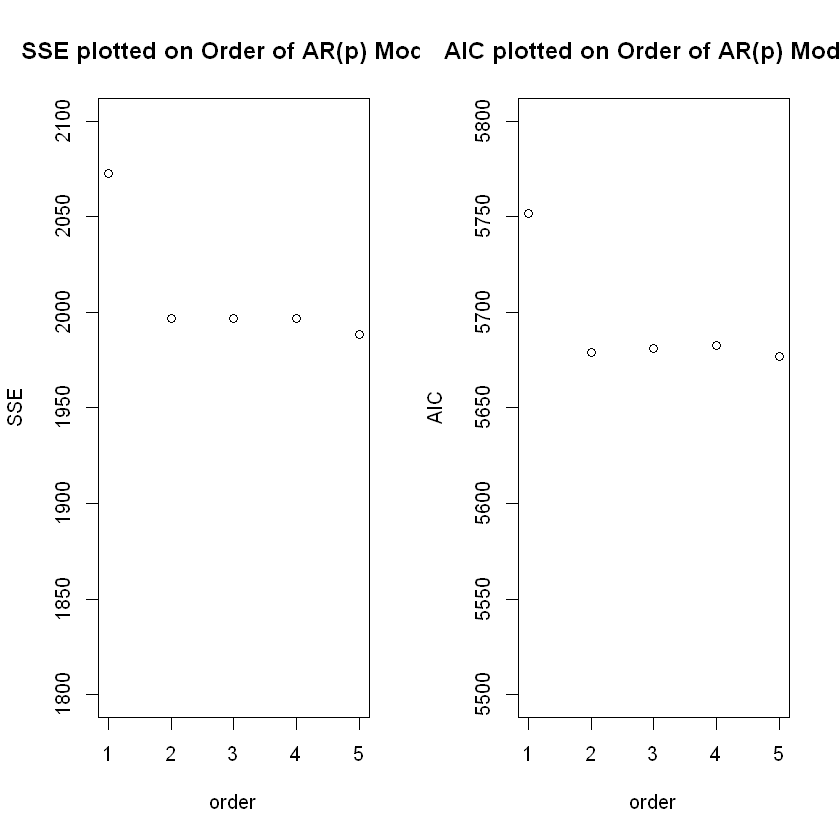

In [46]:
par(mfrow=c(1,2))
order=c(1,2,3,4,5)
plot(SSE~order, main="SSE plotted on Order of AR(p) Model", ylim=c(1800, 2100))
plot(AIC~order, main="AIC plotted on Order of AR(p) Model", ylim=c(5500, 5800))